In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 导入数据

In [3]:
def readFile(filename):
    datas = pd.read_csv(filename, header=None)
    returnMat = np.zeros((len(datas), 3))
    datas = datas.values
    labelVector = []
    index = 0
    for data in datas:
        returnMat[index, 0:2] = data[0: 2]
        returnMat[index, -1] = 1
        labelVector.append(int(data[-1]))
        index += 1
    return returnMat, labelVector

## 数据可视化

In [4]:
def drawn(dataMat, labels, W):
    for i in range(len(labels)):
        if labels[i] == 1:
            plt.scatter(dataMat[i,0], dataMat[i,1], c = 'red', label='Positive')
        else:
            plt.scatter(dataMat[i,0], dataMat[i,1], c = 'green', label='Negative')
    x0 = np.arange(4.0, 7.0, 0.07)
    x1 = (-W[0]*x0-W[2])/W[1]
    plt.plot(x0, x1)
    plt.grid(True)#显示网格线
    plt.show()

## 计算sign标签值

In [5]:
def sign(W,dataMat):
    index = 0
    labelSet = []
    for d in dataMat:
        result = W.dot(d.T)
        if result > 0:
            labelSet.append(1)
        else:
            labelSet.append(-1)
        index += 1
    return labelSet

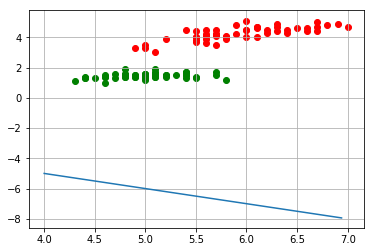

In [6]:
dataMat, labels = readFile('F:/workspace-Jupyter/NationalFestival_HW/data1.csv')
W = np.array([1, 1, 1])
drawn(dataMat[:,0:2], labels, W)

W:  [-3.3  8.1 -1. ]


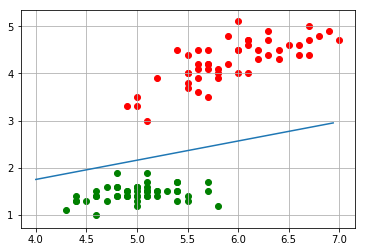

In [7]:
signResult = sign(W,dataMat)
while signResult != labels:
    for s in range(len(signResult)):
        if signResult[s] != labels[s]:
            # 更新权重W
            W = W + labels[s]*dataMat[s, :]
            # 重新计算label
            signResult = sign(W,dataMat)
print('W: ',W)
drawn(dataMat[:,0:2], sign(W,dataMat),W)